In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy import stats
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [106]:
df = pd.read_csv("../data/vehicle loand dataset.csv", header=0)

In [107]:
df.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [108]:
df.shape

(121856, 40)

In [109]:
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [111]:
df.isnull().sum() 

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [112]:
df1 = df.drop("ID", axis = 1)
df1 = df1.drop("Social_Circle_Default", axis = 1)
df1 = df1.drop("Own_House_Age", axis = 1)
df1 = df1.drop("Client_Occupation", axis = 1)
df1 = df1.drop("Mobile_Tag", axis = 1)
df1 = df1.drop("Score_Source_3", axis = 1)
df1 = df1.drop("Credit_Bureau", axis = 1)
df1 = df1.drop("Score_Source_1", axis = 1)

In [113]:
print(df1.isnull().sum())

Client_Income                 3607
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                   3638
Credit_Amount                 3632
Loan_Annuity                  4812
Accompany_Client              1746
Client_Income_Type            3701
Client_Education              3645
Client_Marital_Status         3473
Client_Gender                 2413
Loan_Contract_Type            3651
Client_Housing_Type           3687
Population_Region_Relative    4857
Age_Days                      3600
Employed_Days                 3649
Registration_Days             3614
ID_Days                       5968
Homephone_Tag                    0
Workphone_Working                0
Client_Family_Members         2410
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization   

In [114]:
df1 = df1.dropna()

In [115]:
df1.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Phone_Change                  0
Default 

In [116]:
df1.describe()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Phone_Change,Default
count,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000,53756.000000
mean,0.342957,0.332986,0.498196,0.693541,0.413107,0.201373,0.280843,2.149230,2.029913,3.154457,12.068774,0.516352,969.016575,0.080903
std,0.474702,0.471286,0.500001,0.461027,0.724951,0.401030,0.449415,0.913309,0.502804,1.758049,3.274093,0.636380,829.101278,0.272688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.387957,278.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.563454,765.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.662939,1577.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,100.000000,4121.000000,1.000000


<AxesSubplot:>

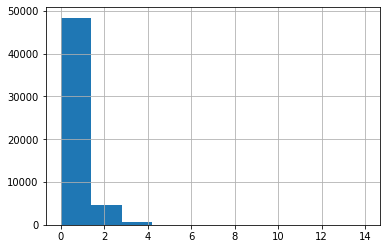

In [117]:
xxx = df1['Child_Count']
xxx.hist()

<AxesSubplot:xlabel='Child_Count'>

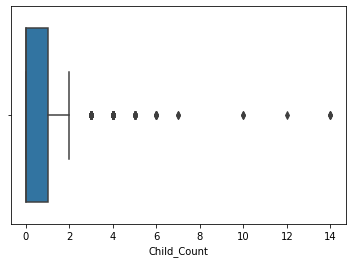

In [118]:
sns.boxplot(df1['Child_Count'])

In [119]:
print(np.where(df1['Child_Count']>5))

(array([ 1479,  5186,  7973,  9705, 14208, 23203, 27129, 27913, 29061,
       34118, 34750, 40321, 45884, 47050], dtype=int64),)


In [120]:
z = np.abs(stats.zscore(df1['Child_Count']))
print(z)

0         0.569847
5         0.809570
6         0.569847
7         0.569847
10        0.809570
            ...   
121850    0.569847
121852    0.569847
121853    0.809570
121854    0.569847
121855    0.809570
Name: Child_Count, Length: 53756, dtype: float64


In [121]:
print(np.where(z > 5))

(array([ 1068,  1479,  1862,  2274,  3542,  4294,  5186,  7973,  8113,
        9705, 14208, 16028, 21646, 23203, 23883, 25474, 25541, 27129,
       27375, 27913, 29061, 34118, 34750, 35327, 37996, 40321, 42518,
       45884, 47050, 48808], dtype=int64),)


In [122]:
df1.Child_Count.unique()

array([ 0.,  1.,  3.,  2.,  4.,  5.,  7., 10.,  6., 12., 14.])

In [123]:
df1.Child_Count.isnull().sum()

0

In [124]:
np.mean(df1['Child_Count'])

0.41310737406056997

In [125]:
Q1 = np.percentile(df1['Child_Count'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['Child_Count'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

0.0
1.0
1.0


In [126]:
upper = df1['Child_Count'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))

Upper bound: 0         False
5         False
6         False
7         False
10        False
          ...  
121850    False
121852    False
121853    False
121854    False
121855    False
Name: Child_Count, Length: 53756, dtype: bool
(array([   21,    43,    46,    52,    85,   118,   241,   250,   312,
         472,   768,   959,  1005,  1057,  1068,  1074,  1095,  1141,
        1178,  1196,  1221,  1386,  1479,  1622,  1737,  1775,  1825,
        1831,  1862,  1884,  2008,  2030,  2056,  2171,  2249,  2274,
        2310,  2506,  2616,  2625,  2642,  2680,  2704,  2813,  2888,
        2958,  2960,  3011,  3083,  3093,  3097,  3200,  3302,  3376,
        3380,  3446,  3452,  3542,  3615,  3621,  3686,  3836,  3921,
        4031,  4037,  4294,  4335,  4345,  4348,  4372,  4393,  4447,
        4592,  4634,  4643,  4848,  5028,  5077,  5091,  5093,  5119,
        5129,  5186,  5187,  5191,  5304,  5318,  5450,  5592,  5613,
        5809,  5935,  5953,  5995,  6056,  6087,  6165,  6211,  

In [127]:
# Below Lower bound
lower = df1['Child_Count'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Lower bound: 0         False
5         False
6         False
7         False
10        False
          ...  
121850    False
121852    False
121853    False
121854    False
121855    False
Name: Child_Count, Length: 53756, dtype: bool
(array([], dtype=int64),)


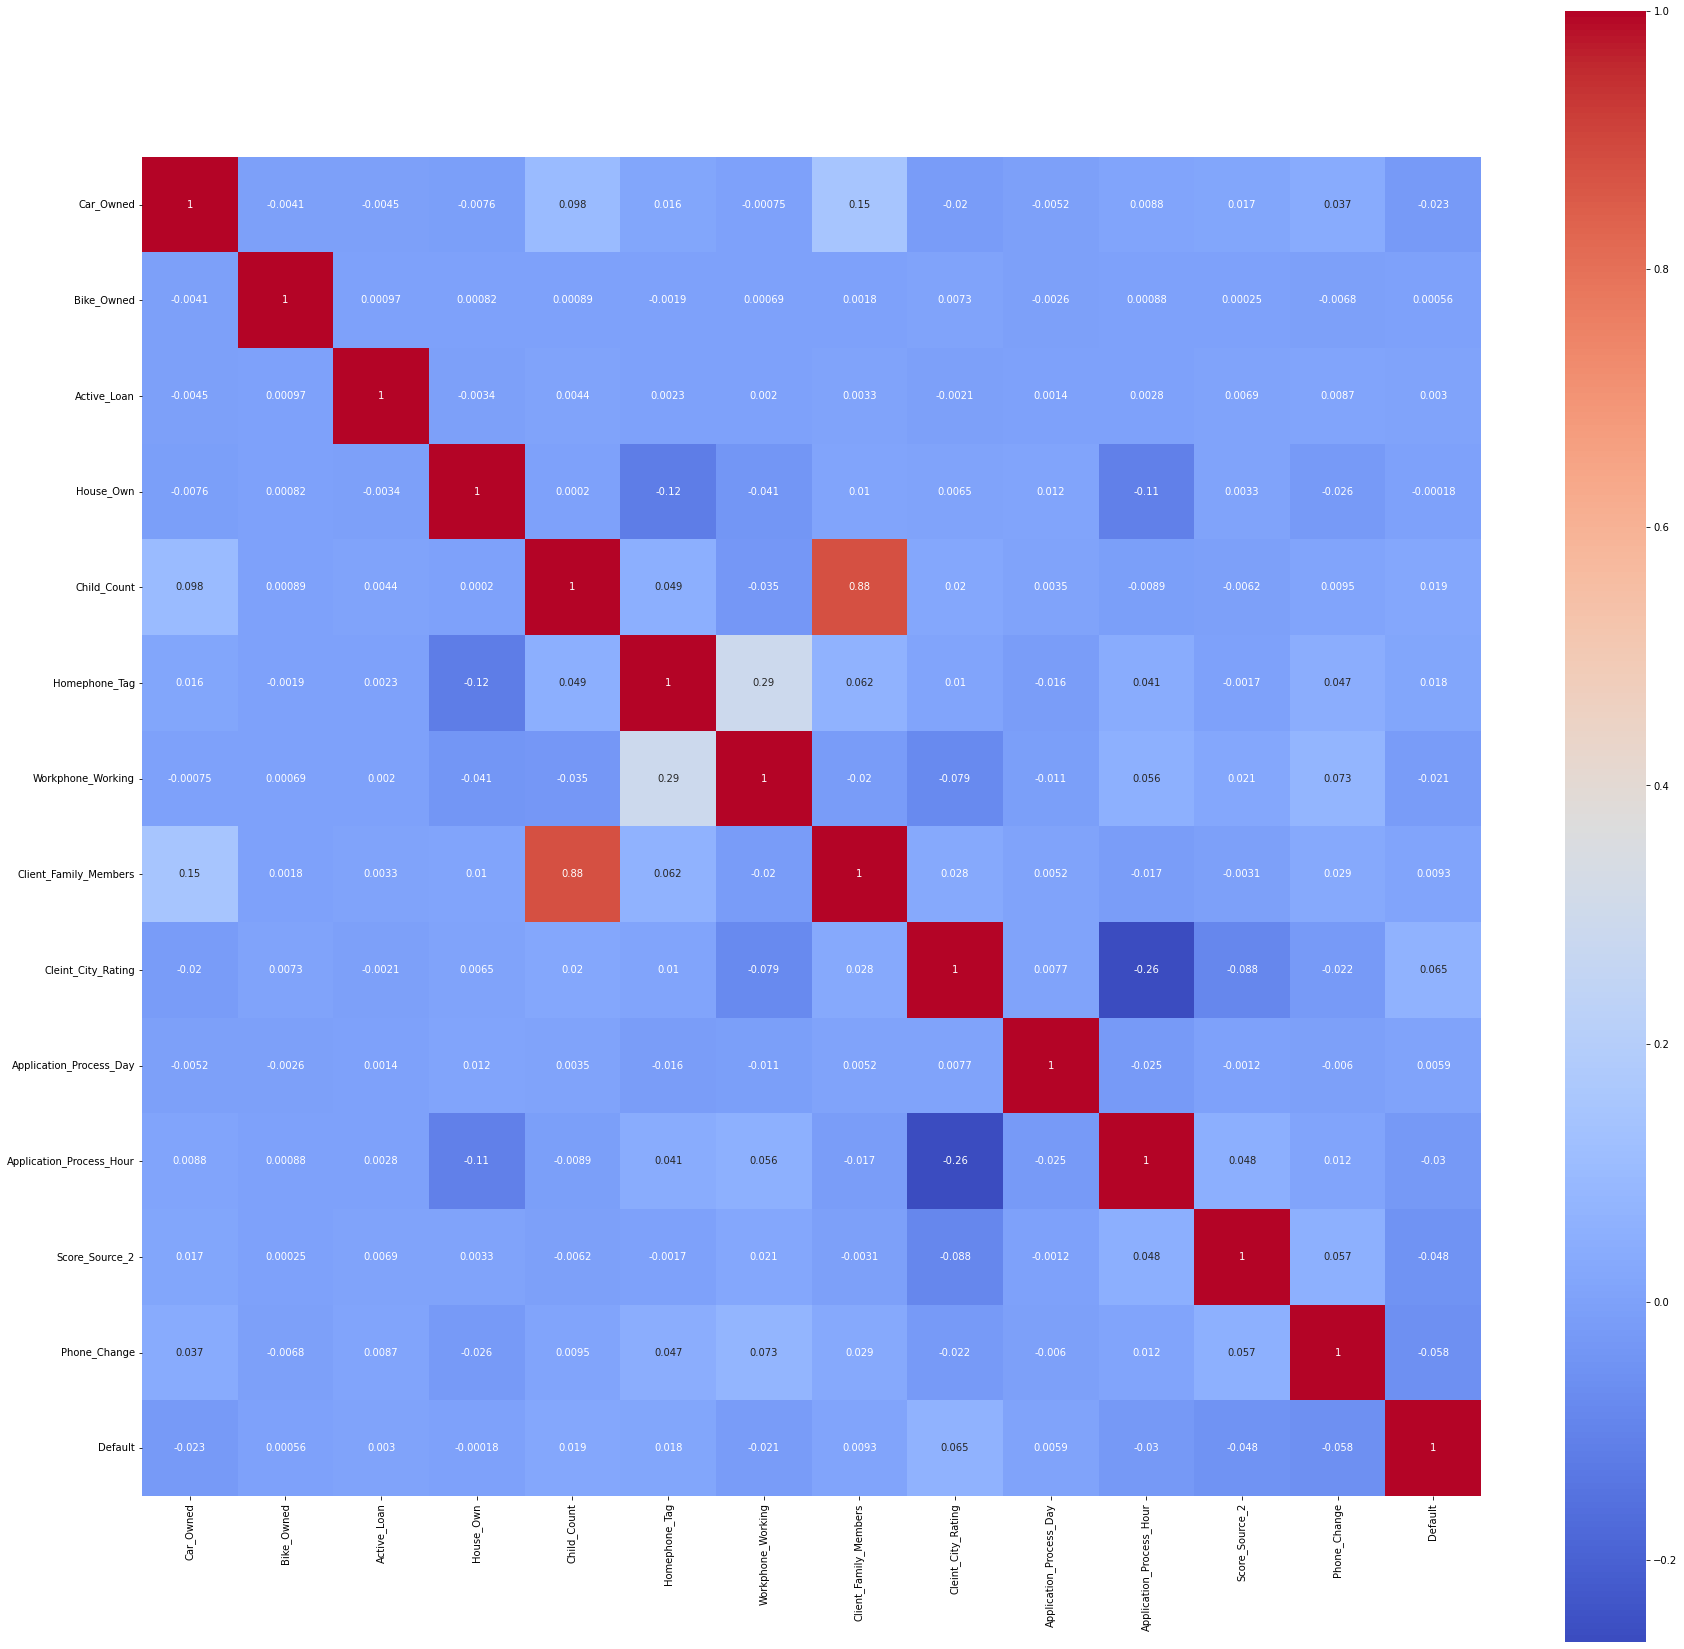

In [128]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [129]:
def correlation_fix(data, treshold):

    corr_cols_set = set()

    corr_matrix = data.corr()

    m = corr_matrix.shape[0]

    n = corr_matrix.shape[1]

    for i in range(m):

        for j in range(n):

            if (abs(corr_matrix.iloc[i, j]) >= treshold or abs(corr_matrix.iloc[i, j]) <= -treshold ):

                col = corr_matrix.columns[i]

                corr_cols_set.add(col)
            

    return corr_cols_set


In [130]:
corr_cols_set = correlation_fix(df1, 0.8)
corr_cols_set

{'Active_Loan',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Bike_Owned',
 'Car_Owned',
 'Child_Count',
 'Cleint_City_Rating',
 'Client_Family_Members',
 'Default',
 'Homephone_Tag',
 'House_Own',
 'Phone_Change',
 'Score_Source_2',
 'Workphone_Working'}

In [131]:
# >>> retriving value from set
s = corr_cols_set
list(s)[0]

'Child_Count'

## correlated column dataframe

In [132]:
df1.dtypes

Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Homephone_Tag                   int64
Workphone_Working               int64
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_Process_Day       float64
Application_Process_Hour      float64
Client_Perma

In [133]:
cols = df1.columns

# >>> remove $
for k in cols:

    for x in df1[str(k)]:
        
        if (x == '$'):
            
            df1.drop(df1[df1[str(k)] == '$'].index, inplace = True)

# >>> remove #VALUE!
for k in cols:

    for x in df1[str(k)]:
        
        if (x == '#VALUE!'):

            df1.drop(df1[df1[str(k)] == '#VALUE!'].index, inplace = True)

# >>> remove null
for k in cols:

    for x in df1[str(k)]:
        
        if (x == 'null'):

            df1.drop(df1[df1[f'X{k}'] == 'null'].index, inplace = True)   

# >>> remove XNA
for k in cols:

    for x in df1[str(k)]:

        if (x == 'XNA'):

            df1.drop(df1[df1[str(k)] == 'XNA'].index, inplace = True)   

# >>> remove x
for k in cols:

    for x in df1[str(k)]:

        if (x == 'x'):

            df1.drop(df1[df1[str(k)] == 'x'].index, inplace = True)  

In [134]:
Finaldf=df1[['Credit_Amount','Client_Income','Loan_Annuity','Age_Days','Phone_Change','ID_Days','Client_Education','Client_Gender','Client_Income_Type','Child_Count','Workphone_Working','Application_Process_Hour','Cleint_City_Rating','Homephone_Tag','Car_Owned' , 'Registration_Days','Default']]

In [135]:
cols = df1.columns
num_cols = df1._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['Loan_Contract_Type',
 'Client_Permanent_Match_Tag',
 'Accompany_Client',
 'Employed_Days',
 'Client_Income',
 'Client_Income_Type',
 'Client_Contact_Work_Tag',
 'ID_Days',
 'Client_Gender',
 'Population_Region_Relative',
 'Client_Marital_Status',
 'Loan_Annuity',
 'Type_Organization',
 'Client_Education',
 'Credit_Amount',
 'Age_Days',
 'Client_Housing_Type',
 'Registration_Days']

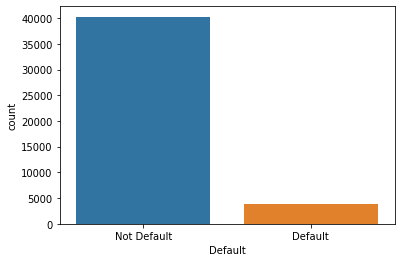

In [136]:
pred_var = sns.countplot(Finaldf['Default'])
pred_var.set_xticklabels(['Not Default','Default'])
plt.show()

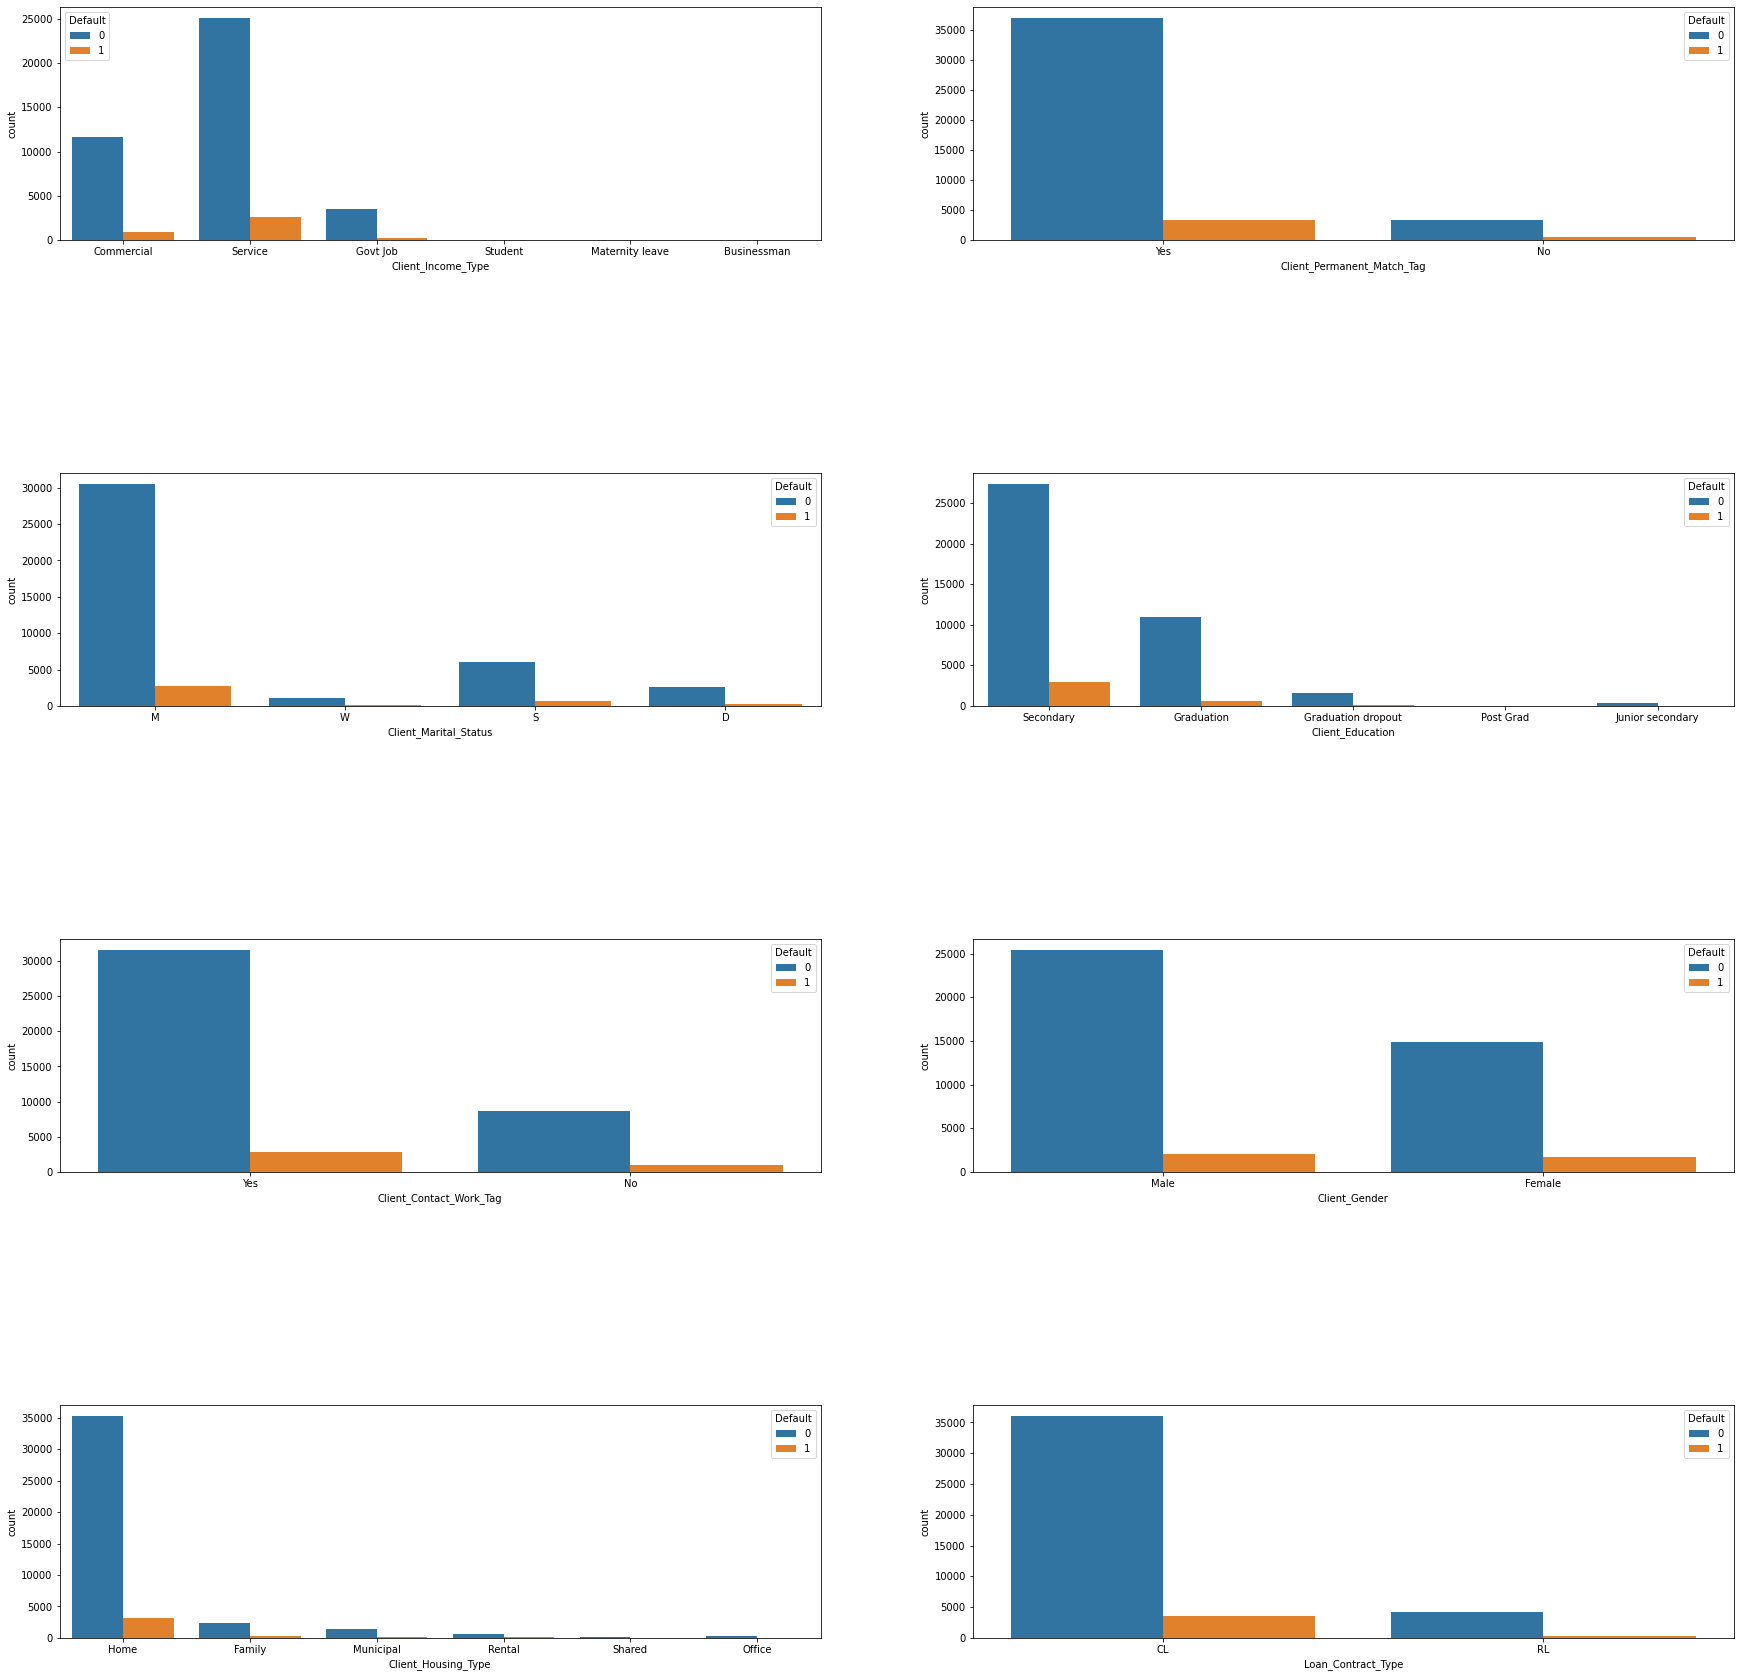

In [137]:
catg_cols = ['Client_Income_Type', 'Client_Permanent_Match_Tag', 'Client_Marital_Status', 'Client_Education', 'Client_Contact_Work_Tag', 'Client_Gender', 
'Client_Housing_Type', 'Loan_Contract_Type']

figure, axes = plt.subplots(4, 2, figsize = (30, 30))

for index, catg_col in enumerate(catg_cols):

    row, col = index // 2, index % 2

    sns.countplot( x = catg_col, data = df1, hue = 'Default', ax=axes[row, col] ) 


plt.subplots_adjust(hspace = 1 )

In [169]:
Y = Finaldf['Default']                  # >>> target column 
X = Finaldf.drop("Default",axis=1)      # >>> independent columns

#apply SelectKBest class to extract top best features

# bestfeatures = SelectKBest(score_func=chi2, k=10)

# fit = bestfeatures.fit(X,Y)

# dfscores = pd.DataFrame(fit.scores_)

# dfcolumns = pd.DataFrame(X.columns)

# #concat two dataframes for better visualization 

# featureScores = pd.concat([dfcolumns,dfscores],axis=1)

# featureScores.columns = ['Specs','Score']  # >>> naming the dataframe columns

# topfeatures=featureScores.nlargest(20,'Score')

In [139]:
# topfeatures

In [140]:
X

,Credit_Amount,Client_Income,Loan_Annuity,Age_Days,Phone_Change,ID_Days,Client_Education,Client_Gender,Client_Income_Type,Child_Count,Workphone_Working,Application_Process_Hour,Cleint_City_Rating,Homephone_Tag,Car_Owned,Registration_Days
0,61190.55,6750,3416.85,13957,63.0,383,Secondary,Male,Commercial,0.0,0,17.0,2.0,1,0.0,6123
5,13752,11250,653.85,13881,739.0,3910,Secondary,Female,Service,1.0,0,10.0,2.0,0,0.0,3910
10,67500,27000,3375,14816,1799.0,4640,Graduation,Male,Govt Job,1.0,0,12.0,2.0,0,0.0,2933
11,149963.85,15750,4397.85,11318,1333.0,2155,Graduation,Male,Service,1.0,0,8.0,2.0,0,0.0,5165
15,105493.5,45000,4482.45,15568,713.0,4739,Secondary,Female,Commercial,1.0,0,9.0,3.0,0,1.0,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121849,18792.9,10350,1736.55,9204.0,774.0,1874.0,Graduation dropout,Male,Service,0.0,1,11.0,2.0,0,0.0,3773.0
121852,104256,15750,3388.05,8648.0,4.0,1209.0,Graduation,Female,Commercial,0.0,0,12.0,3.0,1,0.0,902.0
121853,55107.9,8100,2989.35,9152.0,0.0,353.0,Secondary,Male,Govt Job,1.0,0,11.0,3.0,0,0.0,3980.0
121854,45000,38250,2719.35,10290.0,0.0,2902.0,Graduation,Female,Service,0.0,0,12.0,2.0,0,1.0,895.0


In [141]:
Y

0         0
5         0
10        0
11        0
15        0
         ..
121849    0
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 44075, dtype: int64

In [142]:
X.head(5)

,Credit_Amount,Client_Income,Loan_Annuity,Age_Days,Phone_Change,ID_Days,Client_Education,Client_Gender,Client_Income_Type,Child_Count,Workphone_Working,Application_Process_Hour,Cleint_City_Rating,Homephone_Tag,Car_Owned,Registration_Days
0,61190.55,6750,3416.85,13957,63.0,383,Secondary,Male,Commercial,0.0,0,17.0,2.0,1,0.0,6123
5,13752,11250,653.85,13881,739.0,3910,Secondary,Female,Service,1.0,0,10.0,2.0,0,0.0,3910
10,67500,27000,3375,14816,1799.0,4640,Graduation,Male,Govt Job,1.0,0,12.0,2.0,0,0.0,2933
11,149963.85,15750,4397.85,11318,1333.0,2155,Graduation,Male,Service,1.0,0,8.0,2.0,0,0.0,5165
15,105493.5,45000,4482.45,15568,713.0,4739,Secondary,Female,Commercial,1.0,0,9.0,3.0,0,1.0,1145


In [143]:
X.Client_Income_Type.unique()

array(['Commercial', 'Service', 'Govt Job', 'Student', 'Maternity leave',
       'Businessman'], dtype=object)

In [144]:
X['Client_Income_Type'] = [x if x in ('Commercial', 'Service', 'Govt Job') else 'Service' for x in X['Client_Income_Type']]

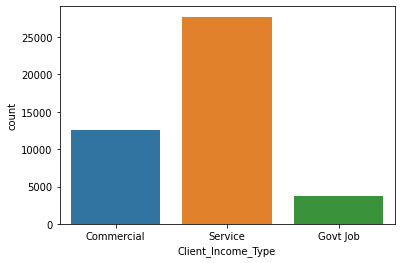

In [145]:
pred_var = sns.countplot(X['Client_Income_Type'])
pred_var.set_xticklabels(['Commercial', 'Service', 'Govt Job'])
plt.show()

In [146]:
X.Client_Education.unique()

array(['Secondary', 'Graduation', 'Graduation dropout', 'Post Grad',
       'Junior secondary'], dtype=object)

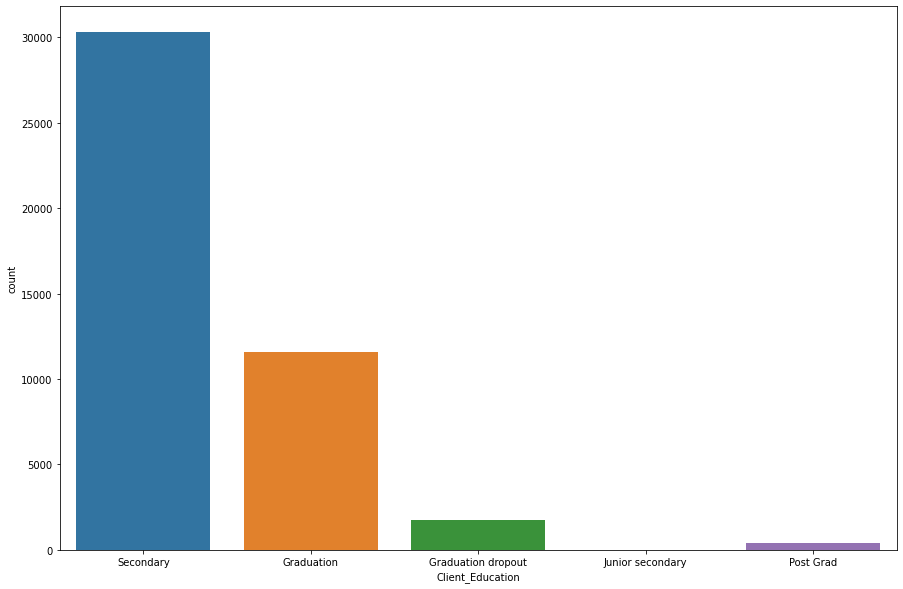

In [147]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['Client_Education'])
pred_var.set_xticklabels(['Secondary', 'Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad'])
plt.show()

In [148]:
X['Client_Education'] = [x if x in ('Secondary', 'Graduation') else 'Other' for x in X['Client_Education']]

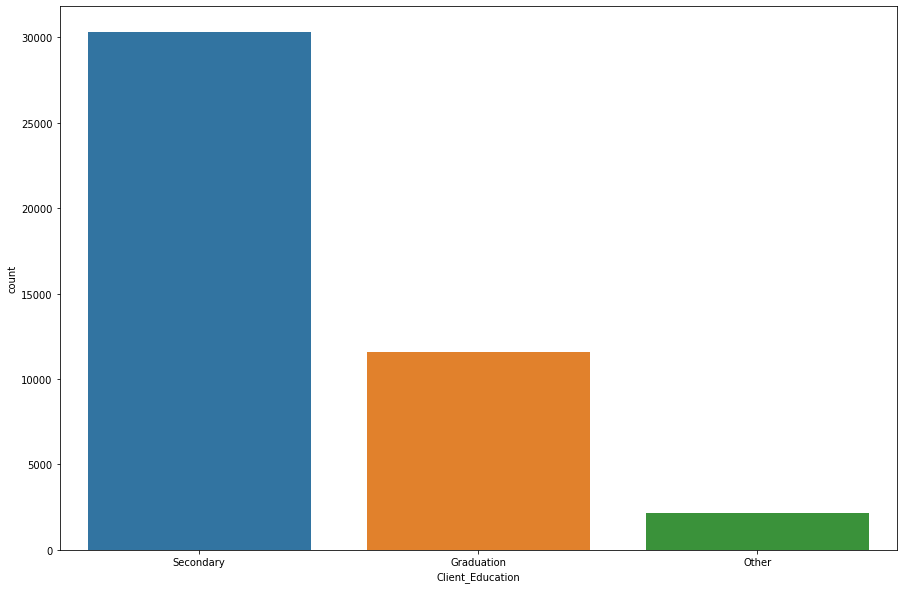

In [149]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['Client_Education'])
pred_var.set_xticklabels(['Secondary', 'Graduation', 'Other'])
plt.show()

In [150]:
X.Client_Gender.unique()

array(['Male', 'Female'], dtype=object)

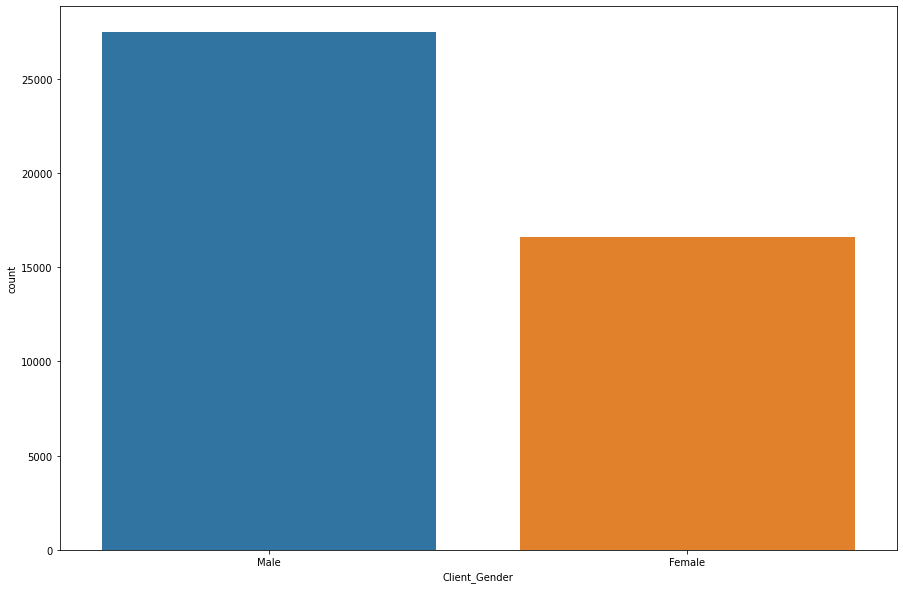

In [151]:
fig = plt.figure() 
fig.set_size_inches(15, 10)
pred_var = sns.countplot(X['Client_Gender'])
pred_var.set_xticklabels(['Male', 'Female'])
plt.show()

In [170]:
X.head(5)

,Credit_Amount,Client_Income,Loan_Annuity,Age_Days,Phone_Change,ID_Days,Client_Education,Client_Gender,Client_Income_Type,Child_Count,Workphone_Working,Application_Process_Hour,Cleint_City_Rating,Homephone_Tag,Car_Owned,Registration_Days
0,61190.55,6750,3416.85,13957,63.0,383,Secondary,Male,Commercial,0.0,0,17.0,2.0,1,0.0,6123
5,13752,11250,653.85,13881,739.0,3910,Secondary,Female,Service,1.0,0,10.0,2.0,0,0.0,3910
10,67500,27000,3375,14816,1799.0,4640,Graduation,Male,Govt Job,1.0,0,12.0,2.0,0,0.0,2933
11,149963.85,15750,4397.85,11318,1333.0,2155,Graduation,Male,Service,1.0,0,8.0,2.0,0,0.0,5165
15,105493.5,45000,4482.45,15568,713.0,4739,Secondary,Female,Commercial,1.0,0,9.0,3.0,0,1.0,1145


In [153]:
numeric_list = []

In [154]:
x_cols = X.columns

In [155]:
for x in X:
    if x in x_cols:
        X[x] = pd.to_numeric(X[x],errors = 'coerce')
        numeric_list.append(x)

In [156]:
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

In [168]:
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# X = X.values.astype(np.longlong)

In [166]:
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,Y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# topfeatures=featureScores.nlargest(20,'Score')
# # print(featureScores.nlargest(20,'Score'))  #print 10 best features

In [201]:
X

,Credit_Amount,Client_Income,Loan_Annuity,Age_Days,Phone_Change,ID_Days,Client_Education,Client_Gender,Client_Income_Type,Child_Count,Workphone_Working,Application_Process_Hour,Cleint_City_Rating,Homephone_Tag,Car_Owned,Registration_Days
0,61190.55,6750,3416.85,13957,63.0,383,Secondary,Male,Commercial,0.0,0,17.0,2.0,1,0.0,6123
5,13752,11250,653.85,13881,739.0,3910,Secondary,Female,Service,1.0,0,10.0,2.0,0,0.0,3910
10,67500,27000,3375,14816,1799.0,4640,Graduation,Male,Govt Job,1.0,0,12.0,2.0,0,0.0,2933
11,149963.85,15750,4397.85,11318,1333.0,2155,Graduation,Male,Service,1.0,0,8.0,2.0,0,0.0,5165
15,105493.5,45000,4482.45,15568,713.0,4739,Secondary,Female,Commercial,1.0,0,9.0,3.0,0,1.0,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121849,18792.9,10350,1736.55,9204.0,774.0,1874.0,Graduation dropout,Male,Service,0.0,1,11.0,2.0,0,0.0,3773.0
121852,104256,15750,3388.05,8648.0,4.0,1209.0,Graduation,Female,Commercial,0.0,0,12.0,3.0,1,0.0,902.0
121853,55107.9,8100,2989.35,9152.0,0.0,353.0,Secondary,Male,Govt Job,1.0,0,11.0,3.0,0,0.0,3980.0
121854,45000,38250,2719.35,10290.0,0.0,2902.0,Graduation,Female,Service,0.0,0,12.0,2.0,0,1.0,895.0


In [203]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transform = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6,7,8])], remainder='passthrough')
X = np.array(transform.fit_transform(X))


In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.35,random_state=1000)

In [217]:
x_train.shape

(28648, 26)

In [218]:
x_test.shape

(15427, 26)

In [219]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [220]:
print("Accuracy on training set:", logistic_model.score(x_train , y_train))

Accuracy on training set: 0.9124546216140743


In [221]:
print("Accuracy on test set:", logistic_model.score(x_test , y_test))

Accuracy on test set: 0.9157321579049718


In [222]:

classes = ['Not Default' , 'Default']

def plot_confusionmatrix(pred , test, dom):

    print(f'{dom} Confusion matrix')

    cf = confusion_matrix(pred  , test)

    sns.heatmap(cf , annot = True , yticklabels = classes , xticklabels = classes , cmap = 'Blues' , fmt = 'g' )

    plt.tight_layout()

    plt.show() 

Test Confusion matrix


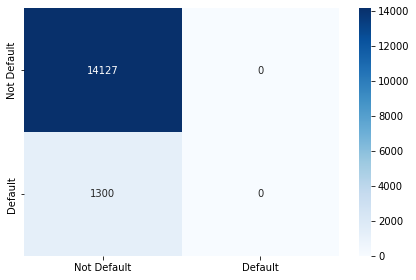

In [223]:
prediction_test = logistic_model.predict(x_test)

plot_confusionmatrix(y_test , prediction_test , dom = 'Test' )

In [224]:
prediction_train = logistic_model.predict(x_train)

In [225]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction_train - y_train)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction_train - y_train) ** 2))
print("R2-score: %.9f" % r2_score(prediction_train , y_train) )

Mean absolute error: 0.09
Residual sum of squares (MSE): 0.09
R2-score: 0.000000000


Train Confusion matrix


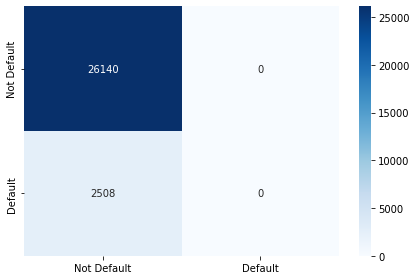

In [226]:
plot_confusionmatrix(y_train , prediction_train , dom = 'Train' )